# Kaggle House Prices - Advanced Regression Techniques

## Overview

This notebook demonstrates my approach to solving the **House Prices** competition on Kaggle. The goal is to predict housing prices based on a variety of features using regression models. The models I employed were:

1. **Linear Regression** 
2. **Gradient Boosting**

## Approach

### 1. Data Cleaning
- Missing values (NaNs) were filled based on the guidance in the dataset's metadata:
  - **Categorical features**: NaNs were replaced with 0.
  - **Continuous numerical features**: NaNs were imputed with the **median**.

### 2. Outliers Handling
- Rather than removing outliers, I applied a **logarithmic transformation (`np.log`)** to the target variable (SalePrice), which reduced skewness in the dataset.

### 3. Models and Results
- The **Linear Regression** model gave an initial RMSE score of **0.28148**.
- By using **Gradient Boosting**, I improved the performance, reducing the RMSE to **0.20608**.

### 4. Visualizations
- Throughout the process, I utilized various **visualizations** to better understand feature distributions and relationships, helping to inform decisions about feature engineering and data transformations.

### Final Thoughts
This notebook reflects a combination of **data cleaning**, **outlier handling**, and **modeling techniques** to improve prediction accuracy for the House Prices competition.


In [54]:
import warnings

# Suppress all UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

In [55]:
!pip install pyforest # install required imports 

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
import pyforest # Import all required imports

In [3]:
#read data set
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
train.head(10) # load train data set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test.head(10) #load tain data set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
print(f'test and train shape respectively: {test.shape}, {train.shape}')

test and train shape respectively: (1459, 80), (1460, 81)


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
print(train.columns, test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

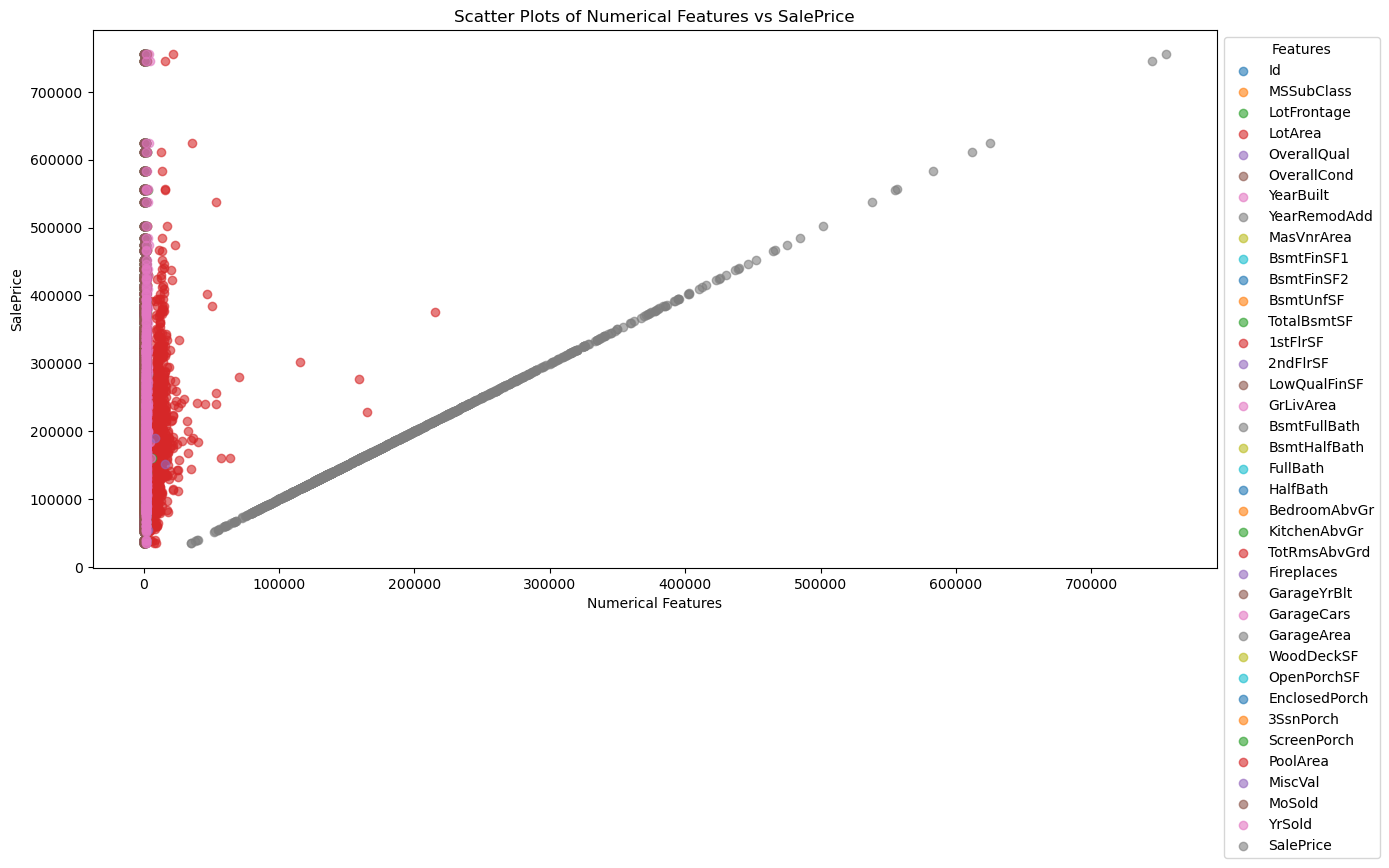

In [9]:
 # Set the figure size

plt.figure(figsize=(14, 8))
# Select numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Create scatter plots for each numerical column against 'SalePrice'
for i in numerical_columns:
   
    

    plt.scatter(train[i], train['SalePrice'], label=i, alpha=0.6)

# Adding labels and title
plt.title('Scatter Plots of Numerical Features vs SalePrice')
plt.xlabel('Numerical Features')
plt.ylabel('SalePrice')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Features')

# Adjust layout
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1400x600 with 0 Axes>

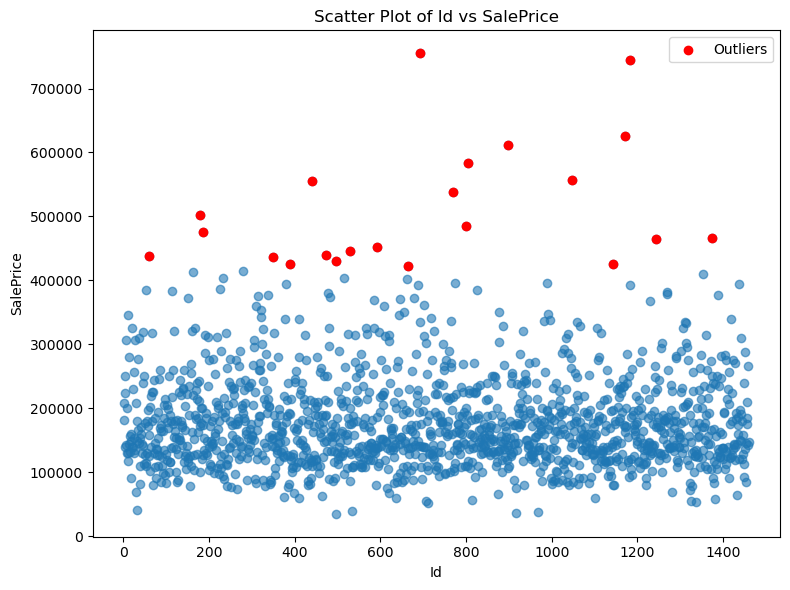

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

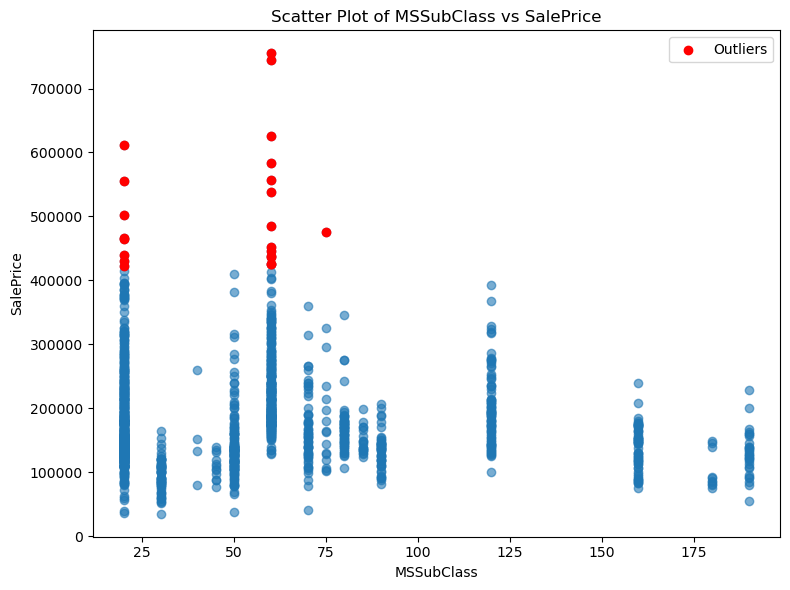

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

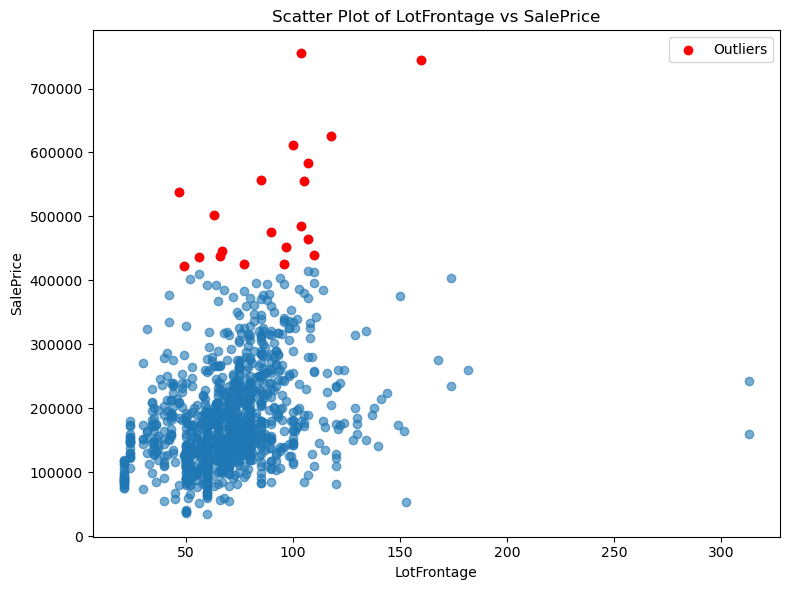

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

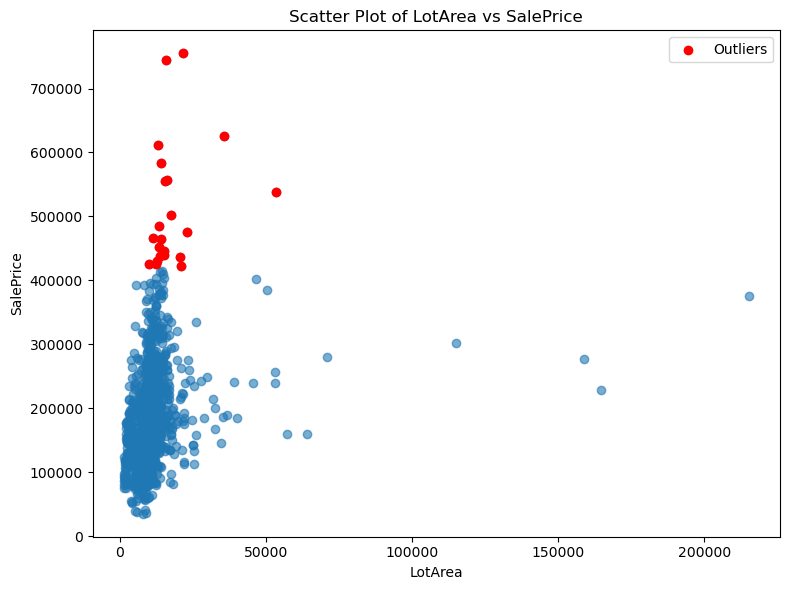

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

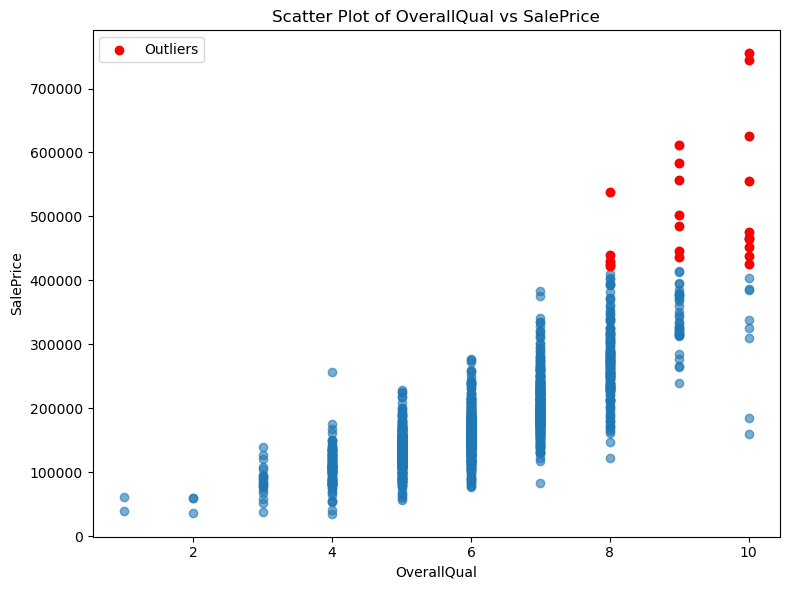

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

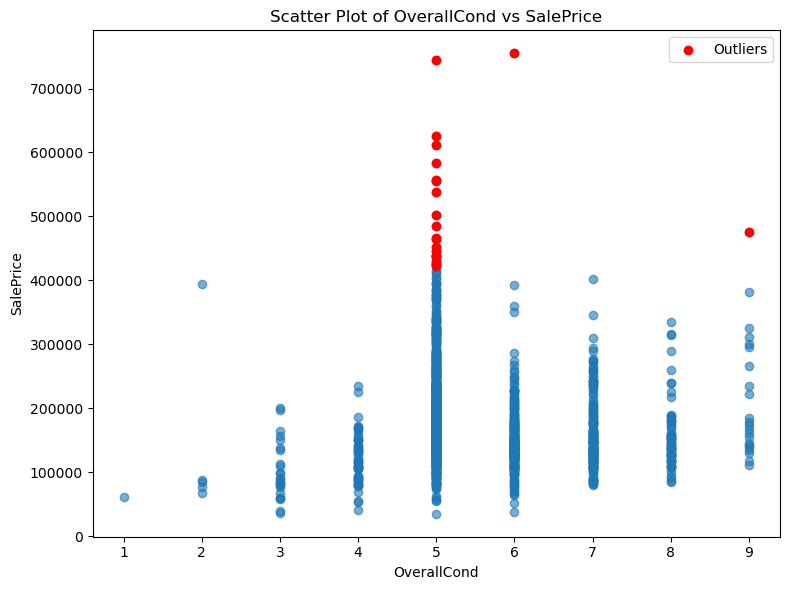

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

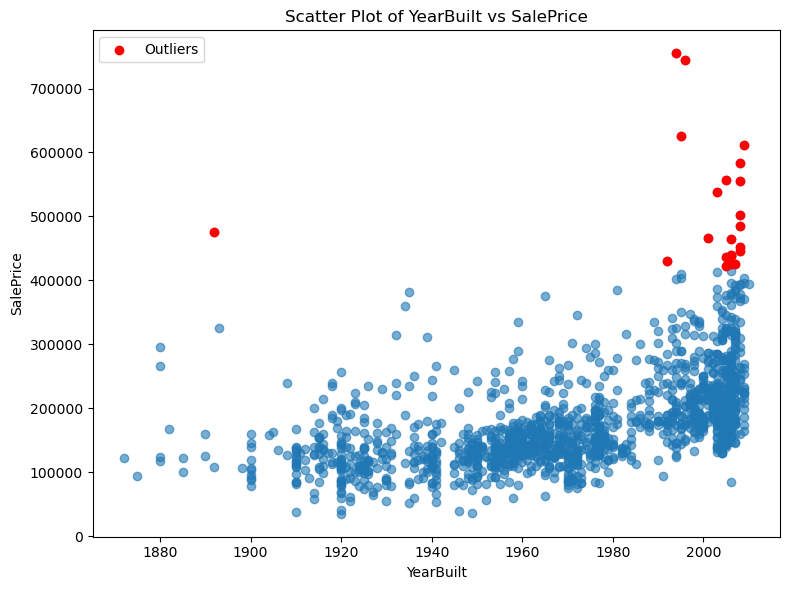

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

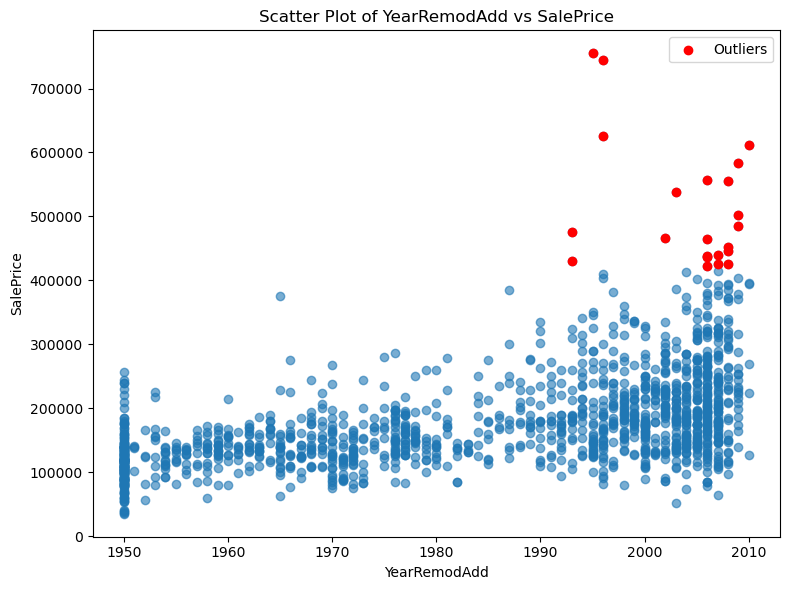

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

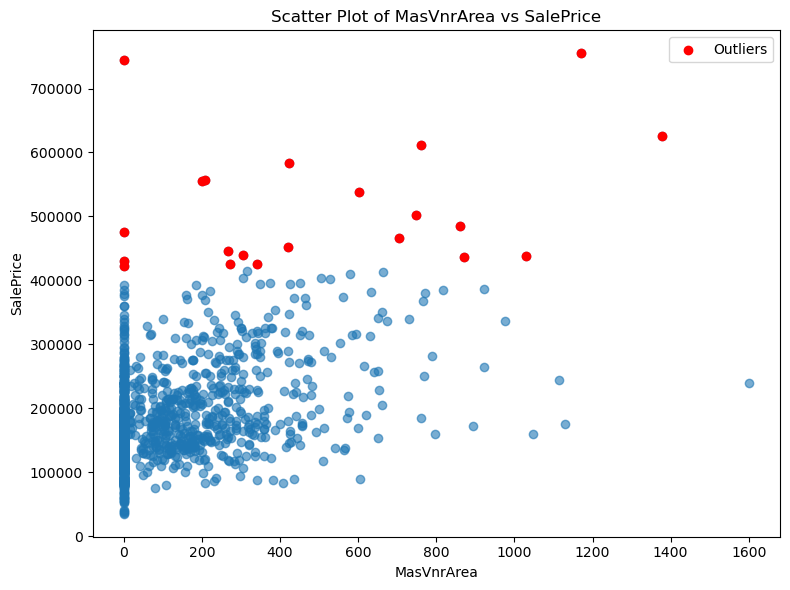

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

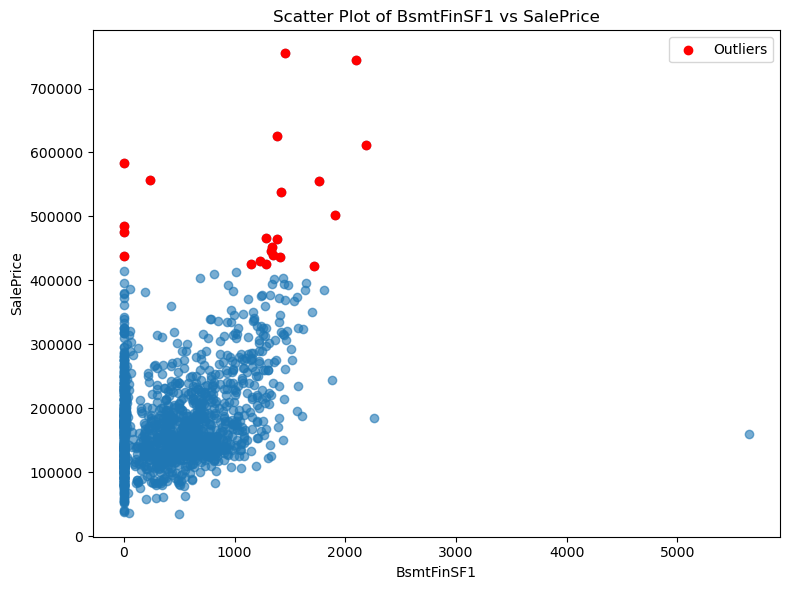

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

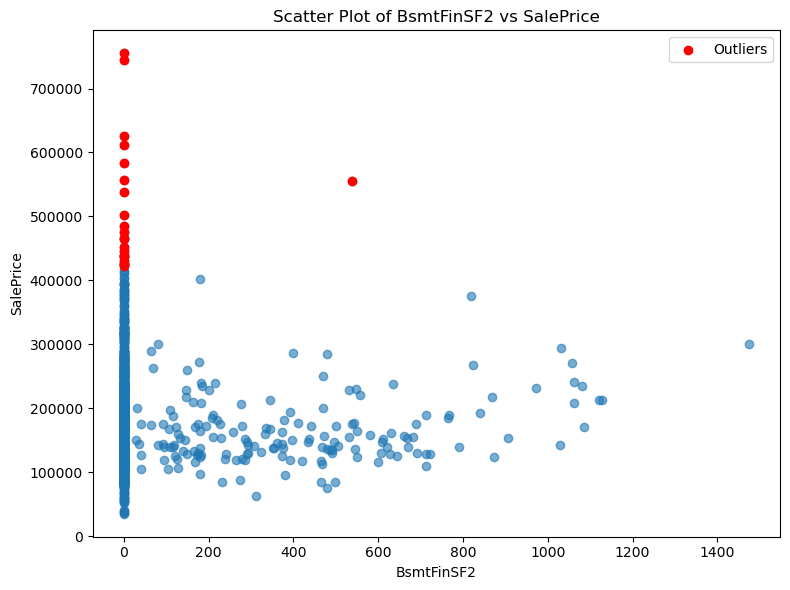

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

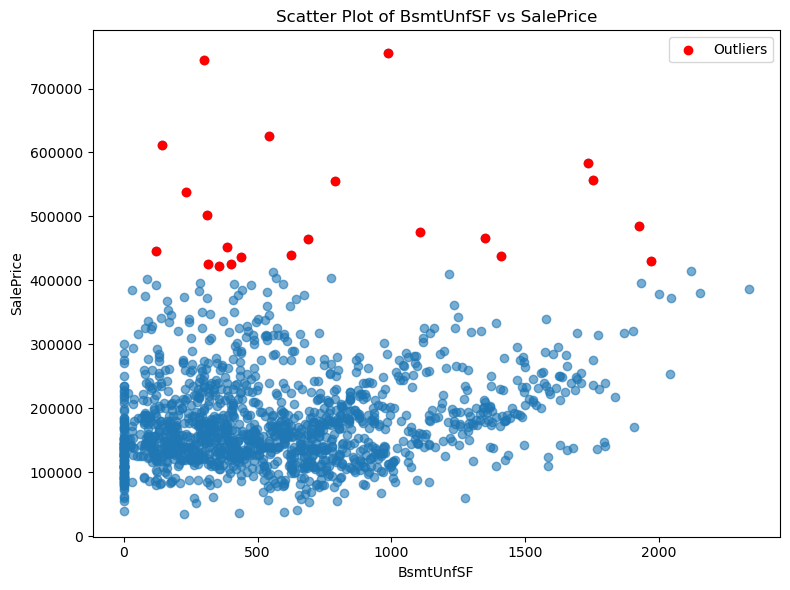

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

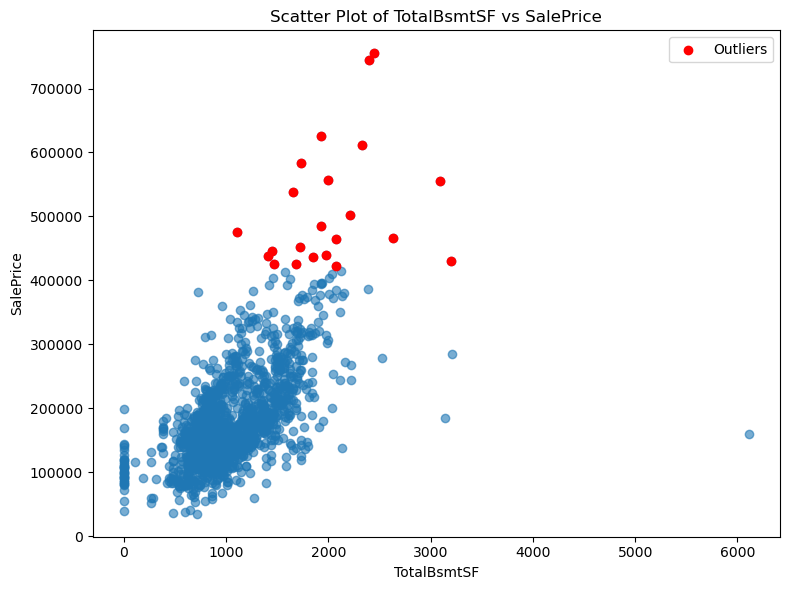

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

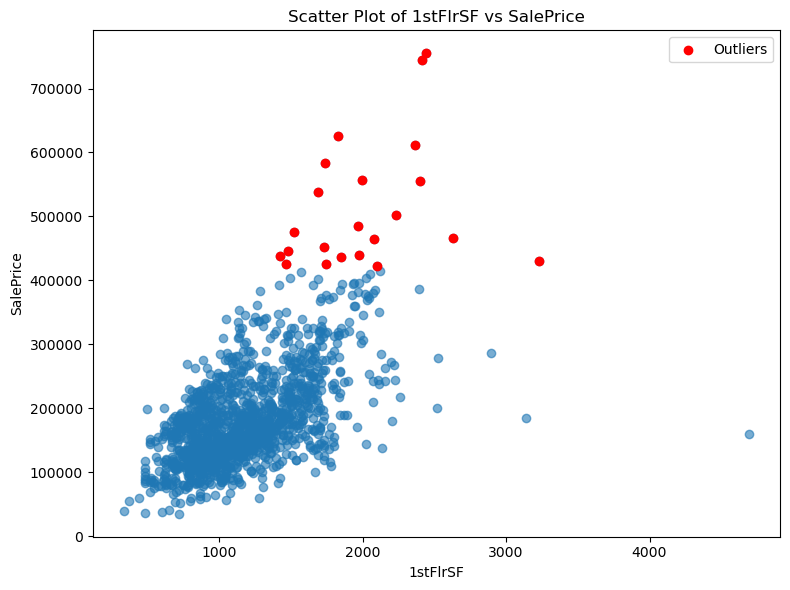

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

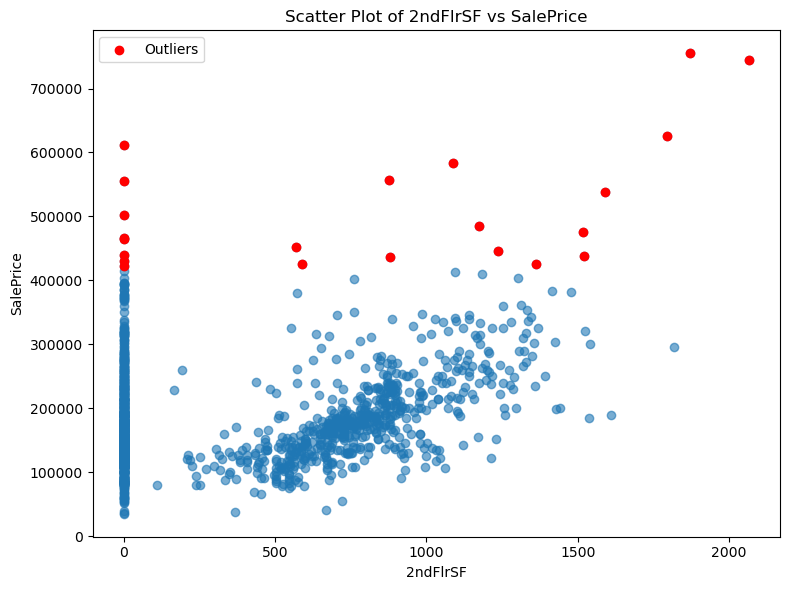

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

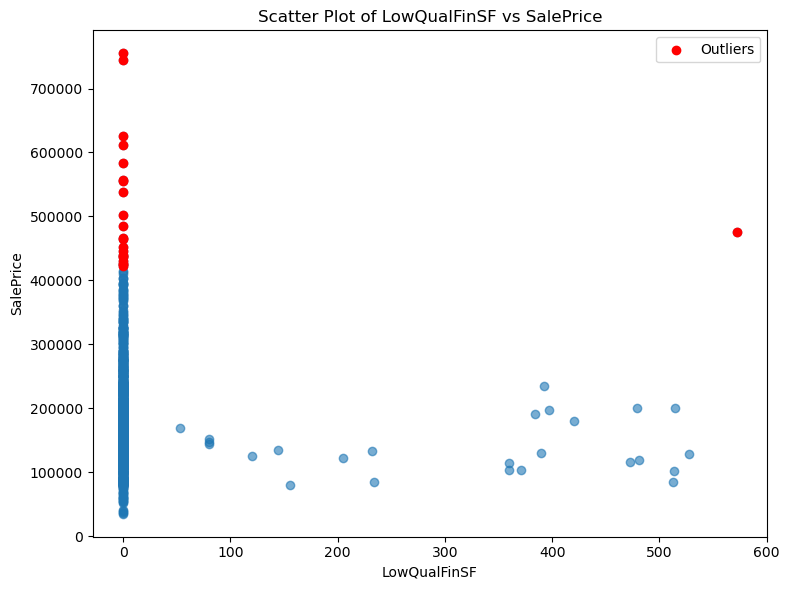

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

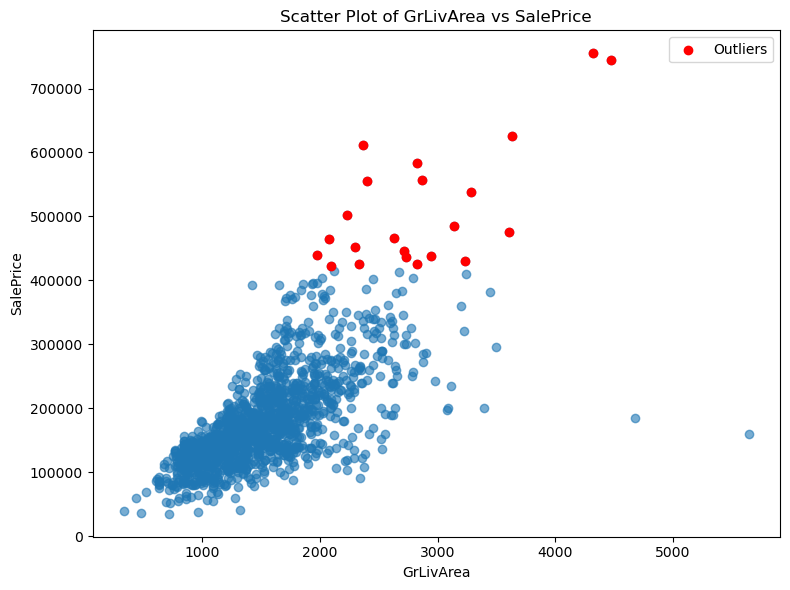

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

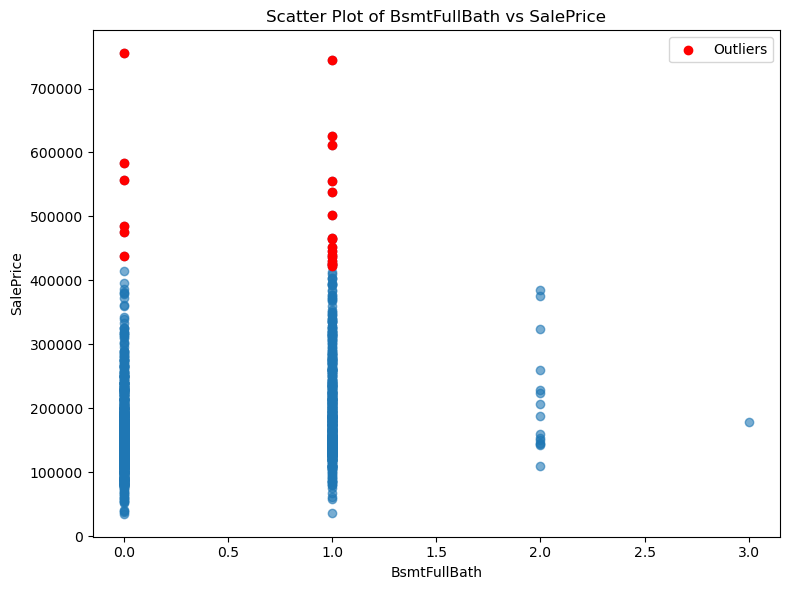

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

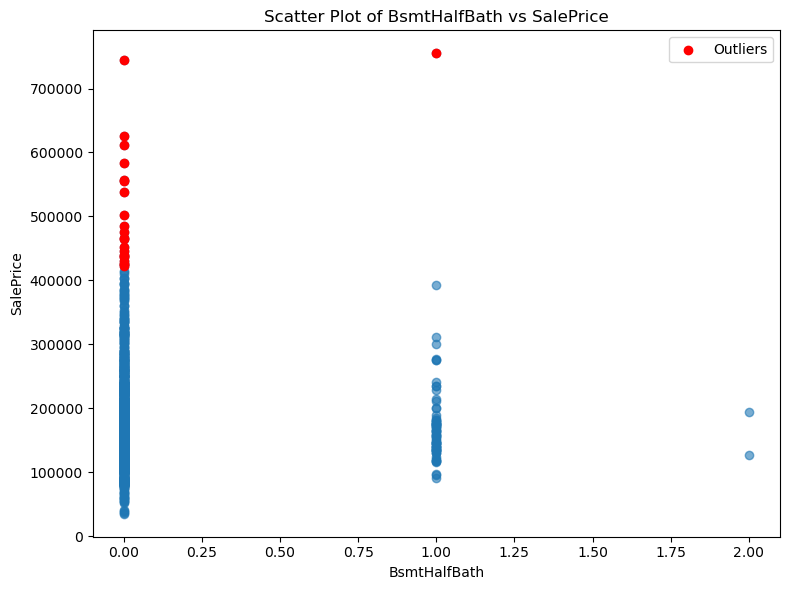

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

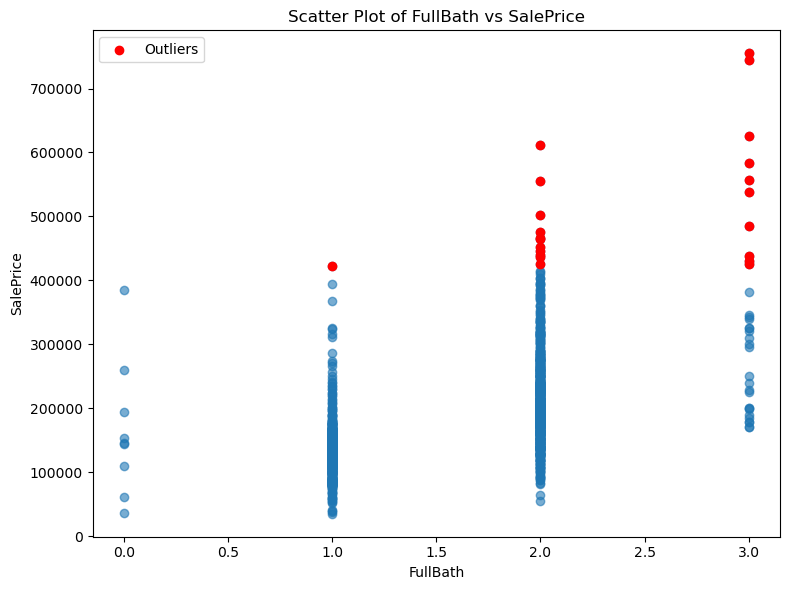

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

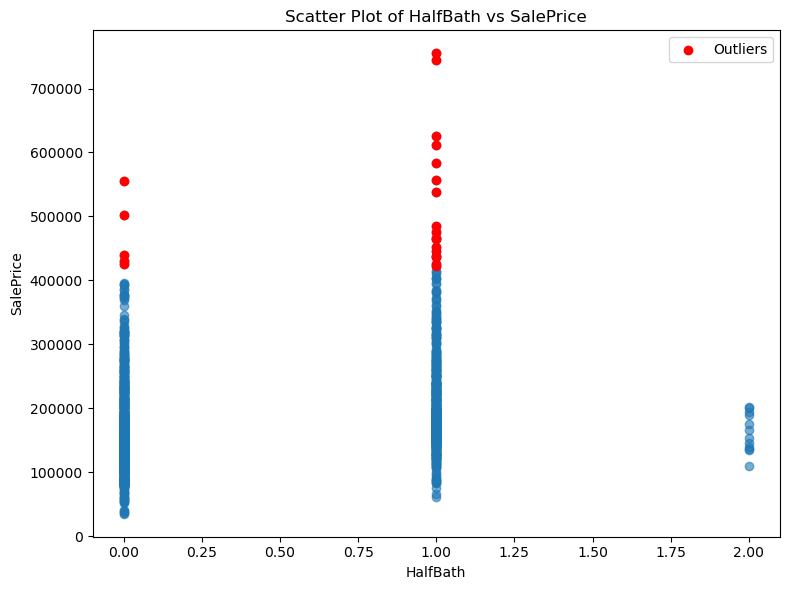

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

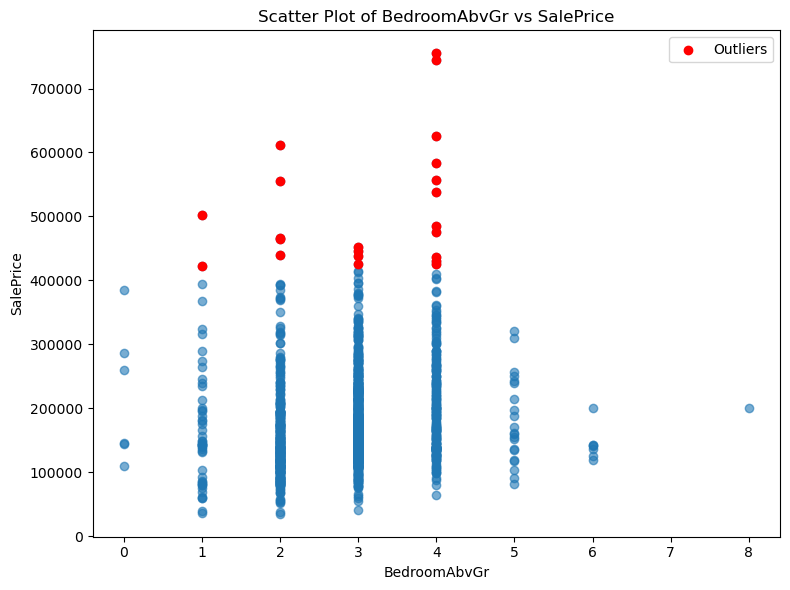

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

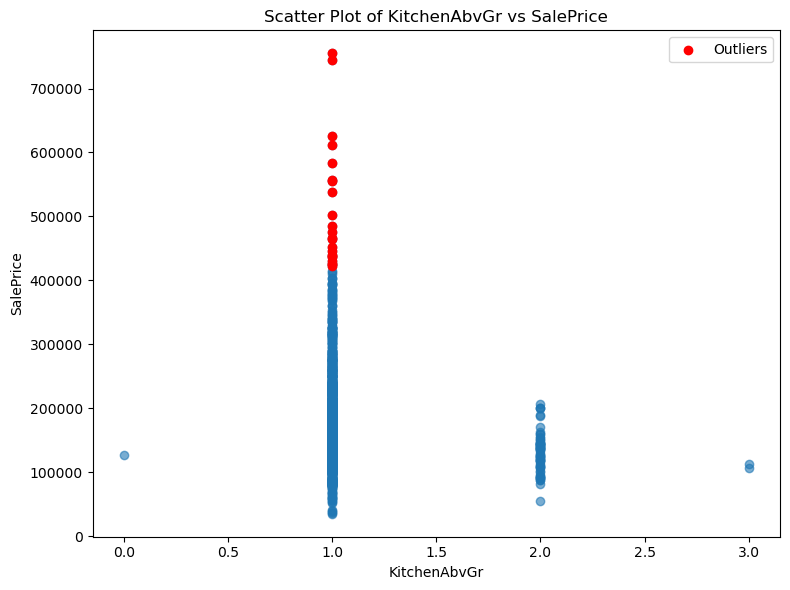

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

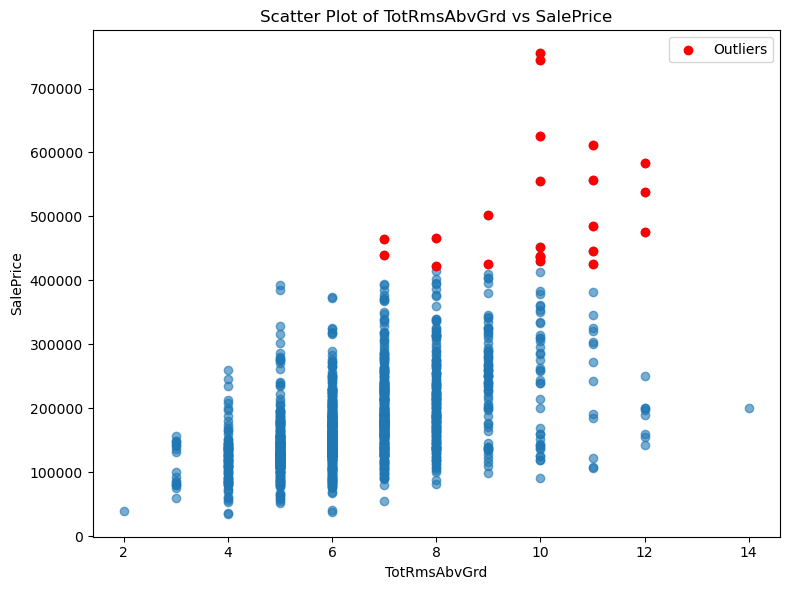

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

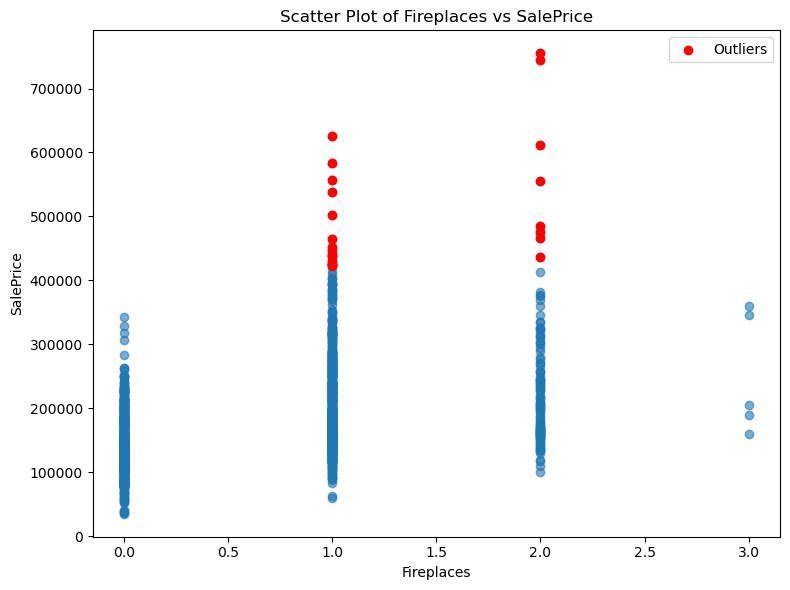

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

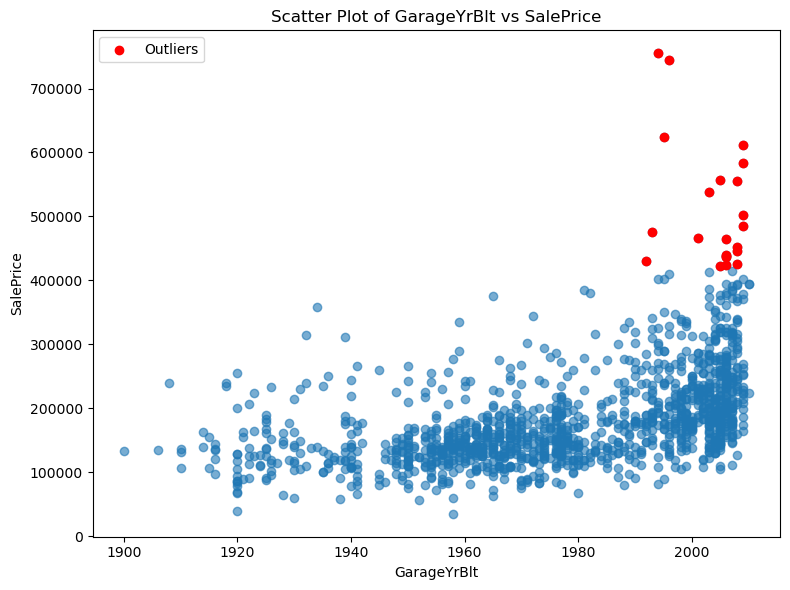

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

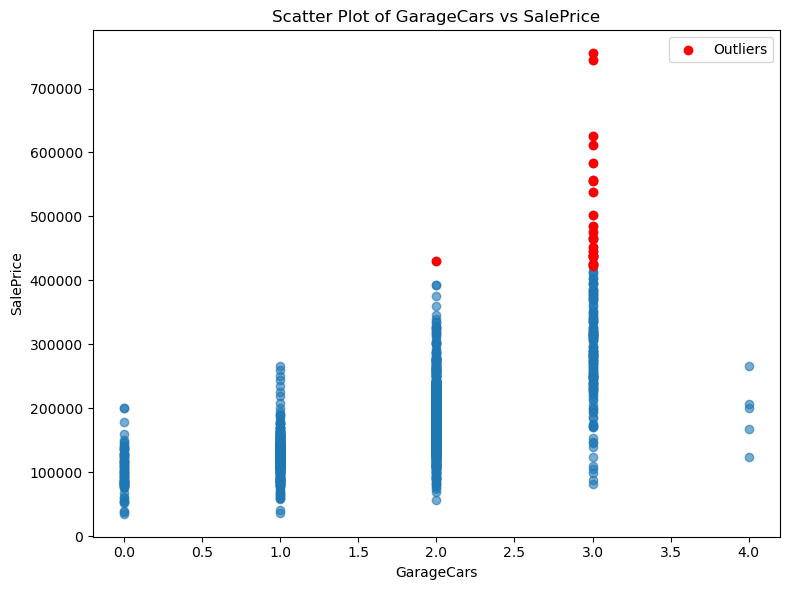

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

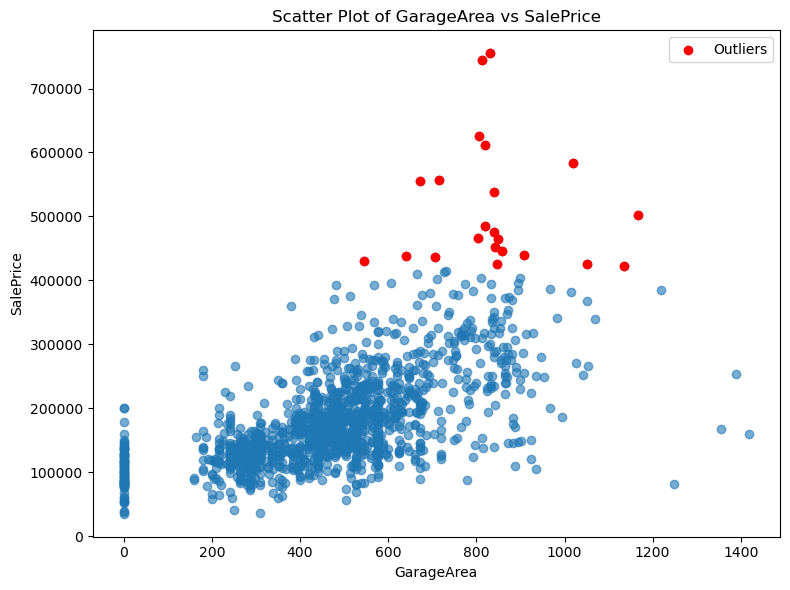

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

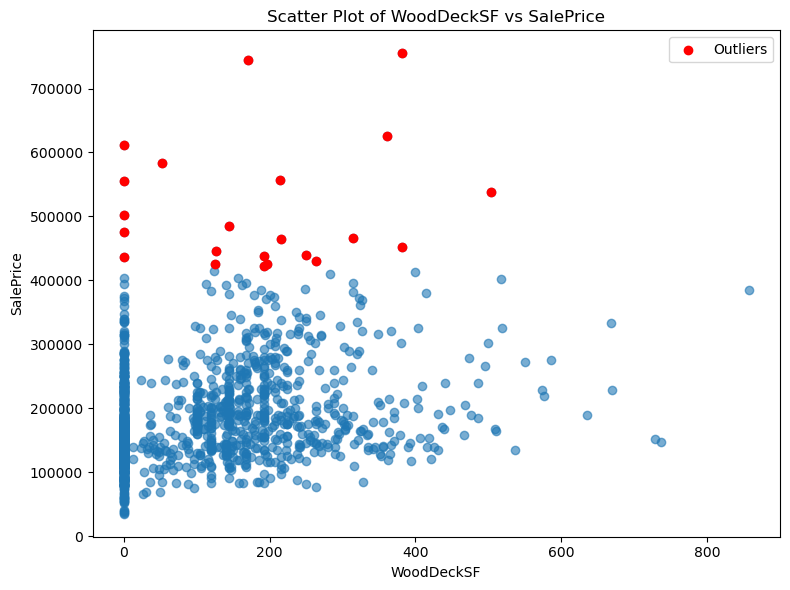

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

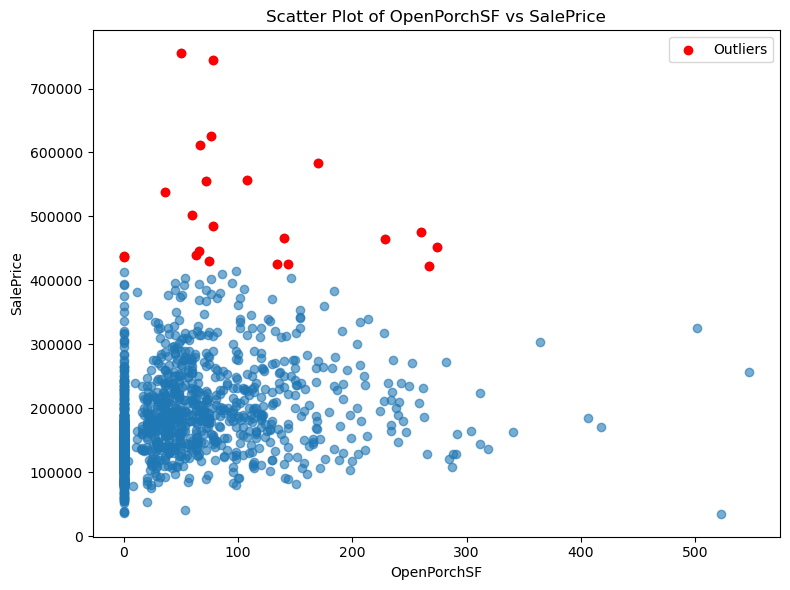

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

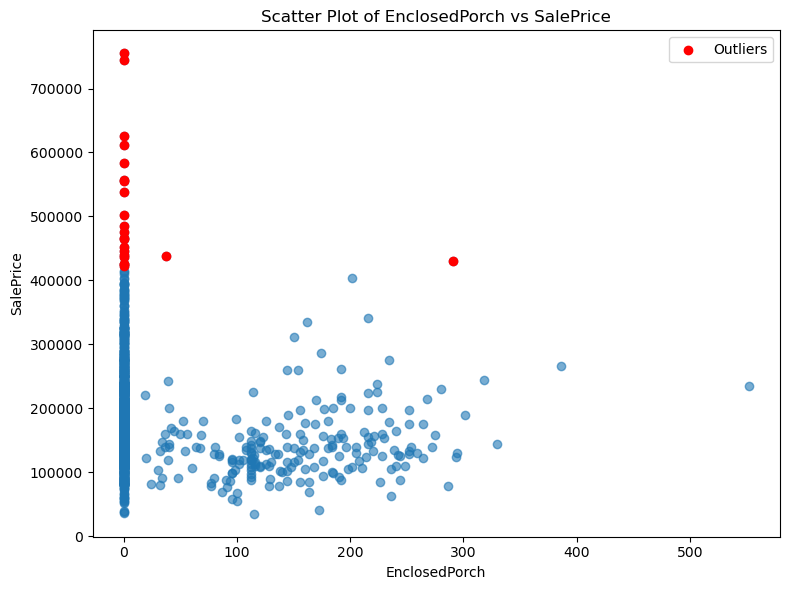

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

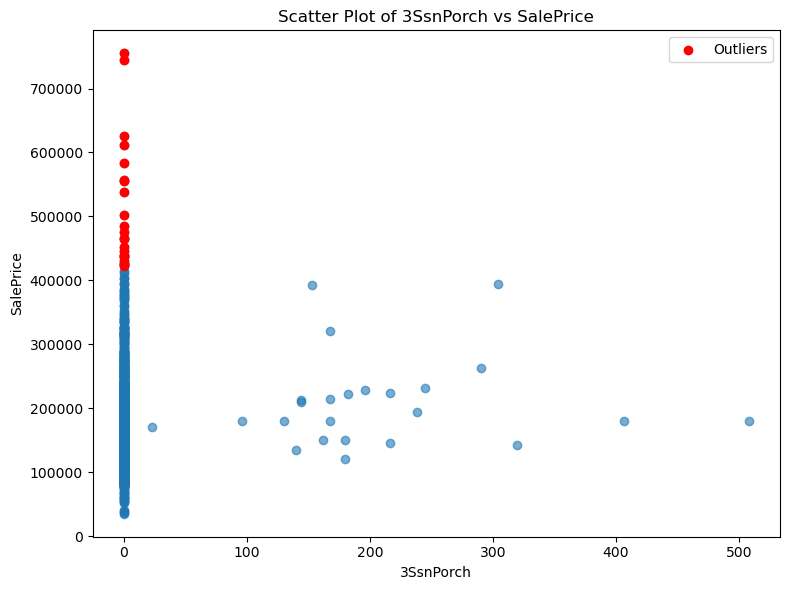

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

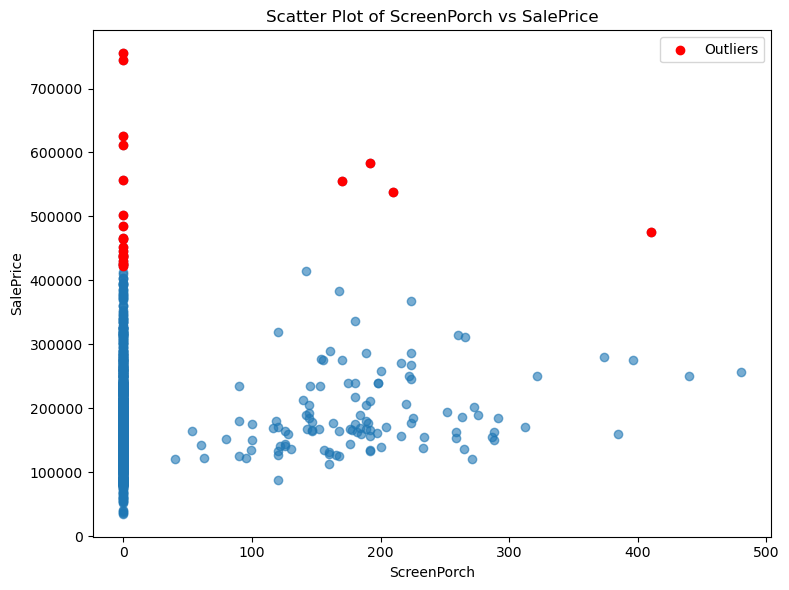

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

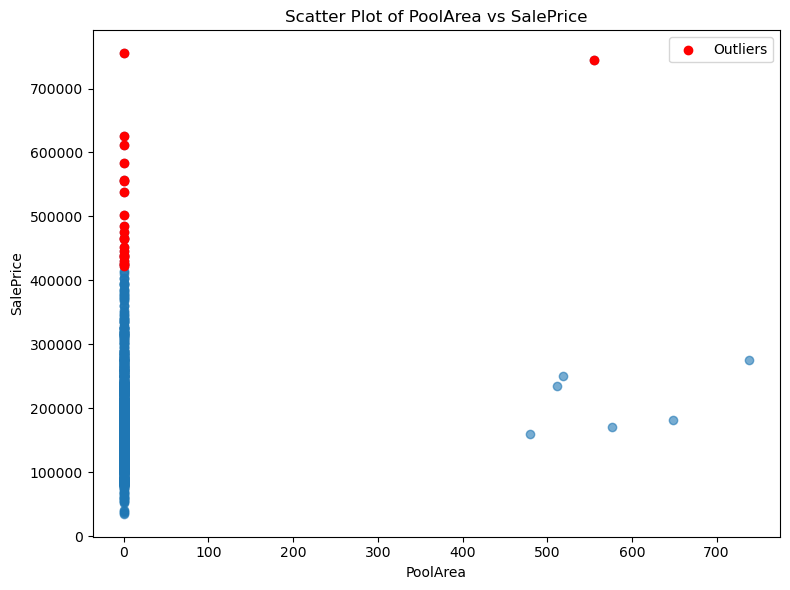

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

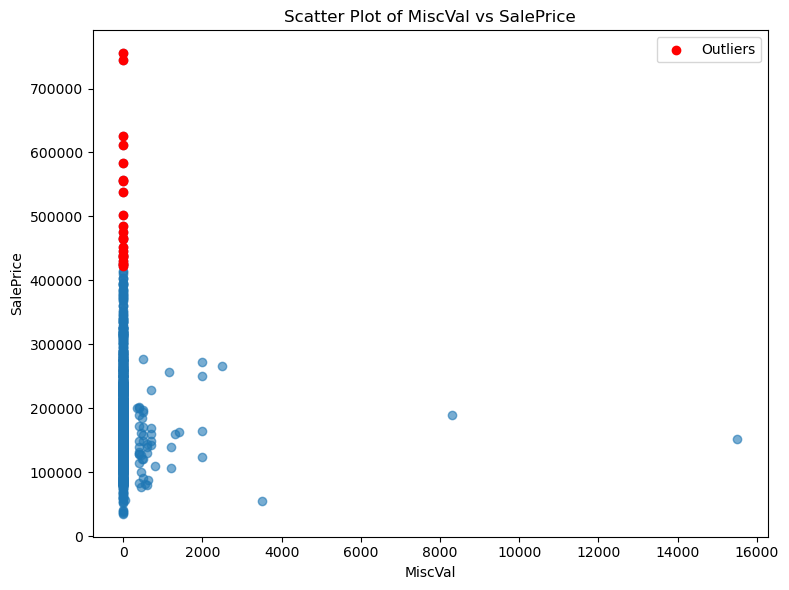

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

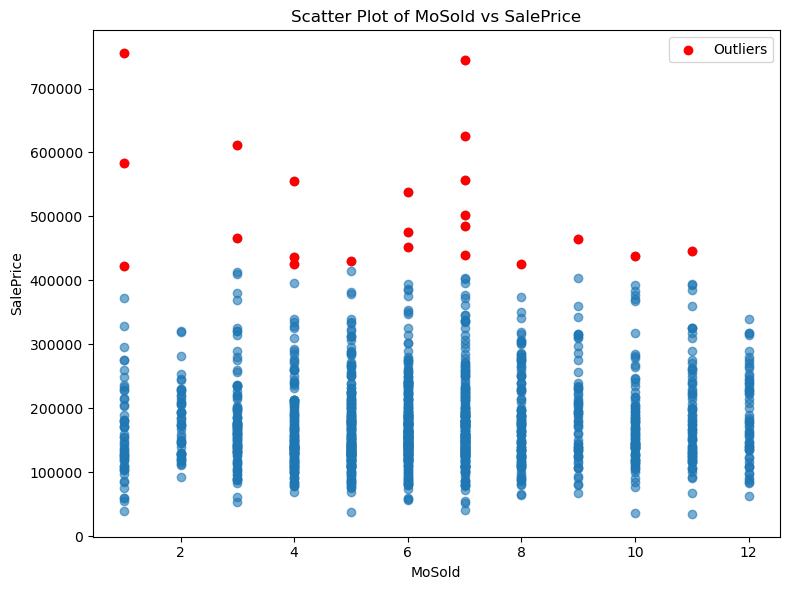

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

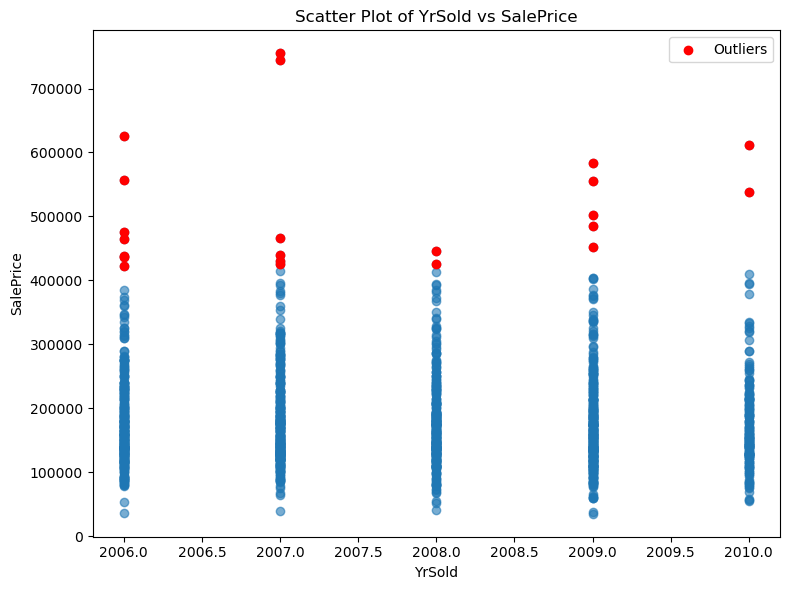

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

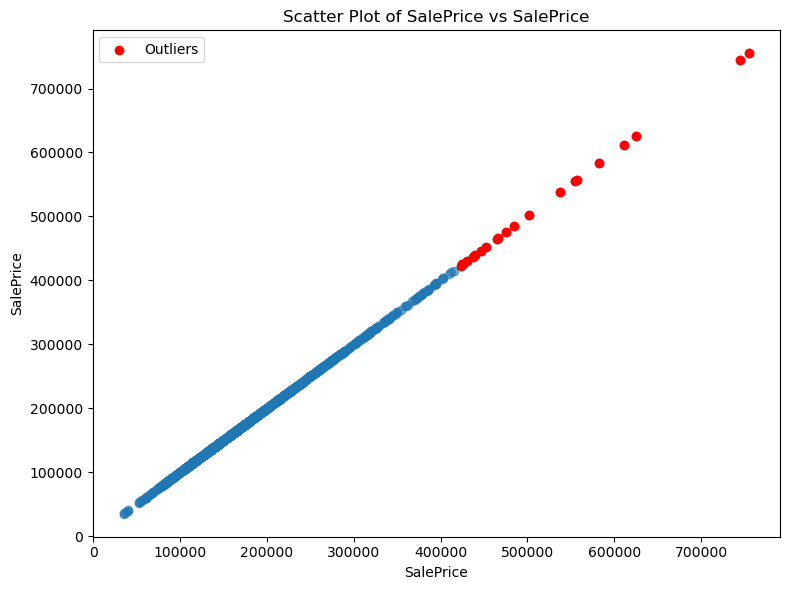

In [10]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create scatter plots for each numerical column against 'SalePrice'
for i in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(train[i], train['SalePrice'], alpha=0.6)
    
    # Calculate the Z-score to identify outliers
    z_scores = (train['SalePrice'] - train['SalePrice'].mean()) / train['SalePrice'].std()
    outliers = train[abs(z_scores) > 3]  # Typically, Z-scores greater than 3 are considered outliers

    # Highlight the outliers in red
    plt.scatter(outliers[i], outliers['SalePrice'], color='red', label='Outliers')
    
    plt.title(f'Scatter Plot of {i} vs SalePrice')
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.legend()
    plt.tight_layout()
    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

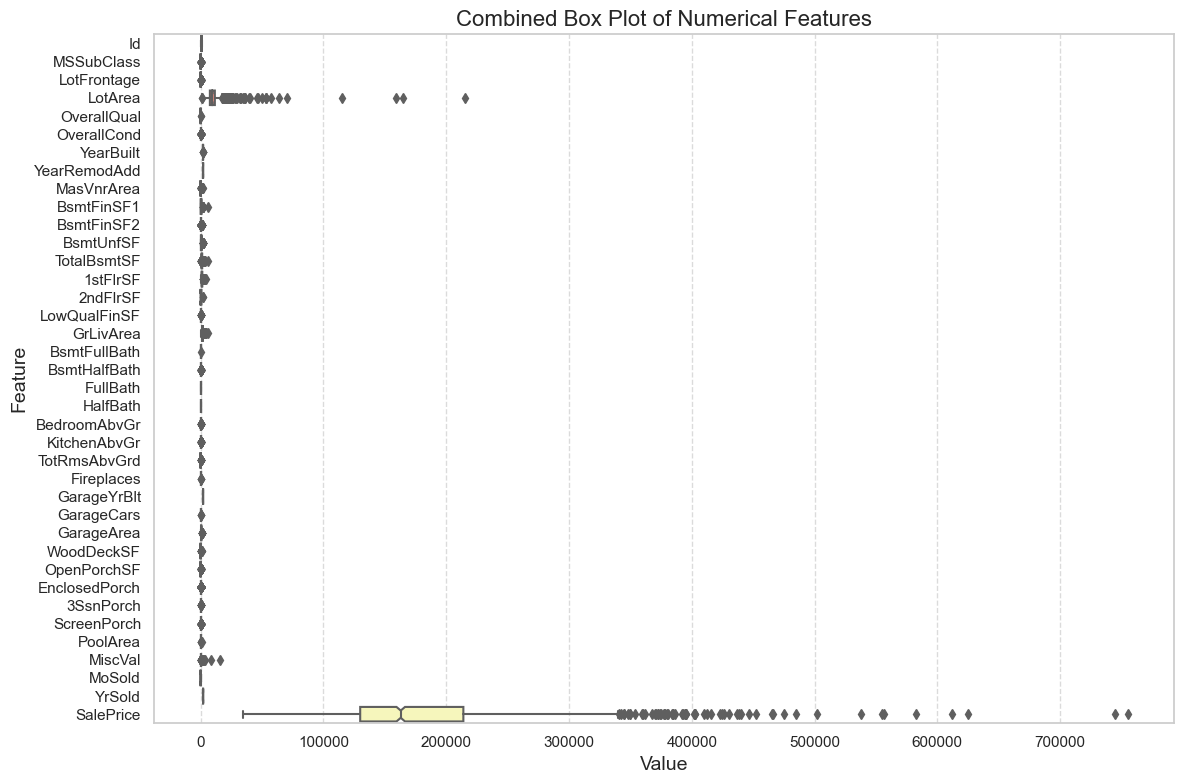

In [11]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Select numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Melt the DataFrame to long format for seaborn
melted_train = train[numerical_columns].melt(var_name='Feature', value_name='Value')

# Create a combined box plot with enhancements
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Set3", len(numerical_columns))  # Use a distinct color palette
sns.boxplot(x='Value', y='Feature', data=melted_train, palette=palette, notch=True)

# Add titles and labels
plt.title('Combined Box Plot of Numerical Features', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add horizontal gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(train[numerical_columns])

# Create a DataFrame of Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

# Identify outliers
outliers = (z_scores_df > 3) | (z_scores_df < -3)

# Display the outliers
outlier_indices = outliers.any(axis=1)
outlier_data = train[outlier_indices]

print("Number of Outliers Detected:", outlier_data.shape[0])
print(outlier_data)


<IPython.core.display.Javascript object>

Number of Outliers Detected: 423
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour U

In [13]:
# Identify outlier Z-scores
outliers = (z_scores_df > 3) | (z_scores_df < -3)

# Check for any outliers in each column
outlier_columns = outliers.any(axis=0)

# Print the names of the columns with outliers
print("Columns with Z-scores greater than 3 or less than -3:")
print(z_scores_df.columns[outlier_columns])

Columns with Z-scores greater than 3 or less than -3:
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

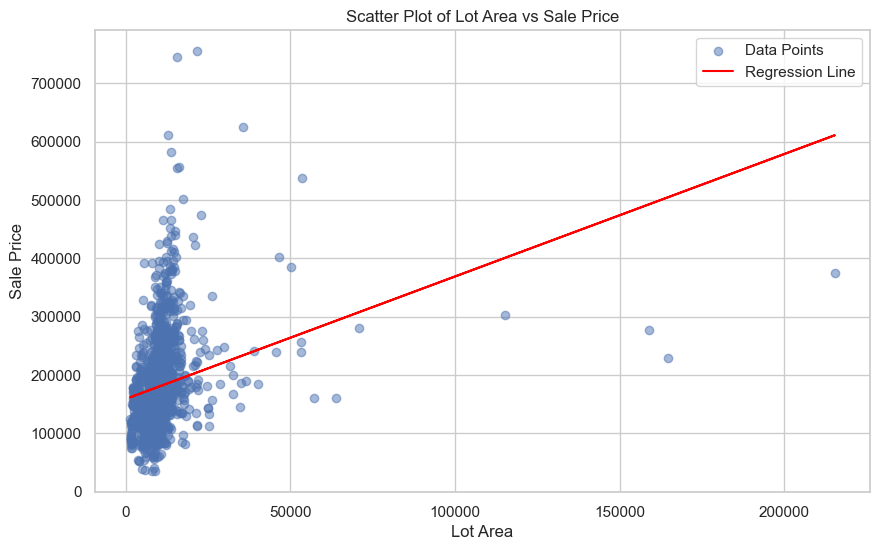

In [14]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train['LotArea'], train['SalePrice'], alpha=0.5, label='Data Points')

# Fit line
slope, intercept = np.polyfit(train['LotArea'], train['SalePrice'], 1)  # 1 indicates linear
line = slope * train['LotArea'] + intercept

# Add the regression line to the plot
plt.plot(train['LotArea'], line, color='red', label='Regression Line')

# Add labels and legend
plt.title('Scatter Plot of Lot Area vs Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Check for null values and count them
null_counts = train.isnull().sum()

# Display columns with null values
if null_counts.sum() > 0:  # Check if there are any null values
    print("Columns with missing values:")
    print(null_counts[null_counts > 0])  # Print only columns with null values
else:
    print("No missing values in the dataset.")


Columns with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [16]:
# Filter rows where 'Electrical' column has null values
missing_electrical = train[train["Electrical"].isnull()]

# Display the result
print(missing_electrical)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1379         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1379      5   2008        WD         Normal     167500  

[1 rows x 81 columns]


In [17]:
# Get the value in the 'Electrical' column at index 1379
electrical_value = train["Electrical"].loc[1379]

# Print the value
print(f"The value at index 1379 in 'Electrical' is: {electrical_value}")


The value at index 1379 in 'Electrical' is: nan


In [18]:
# Check for null values and count them
null_counts = test.isnull().sum()

# Display columns with null values
if null_counts.sum() > 0:  # Check if there are any null values
    print("Columns with missing values:")
    print(null_counts[null_counts > 0])  # Print only columns with null values
else:
    print("No missing values in the dataset.")


Columns with missing values:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [19]:
train=train.fillna(0)

In [20]:
# Select numerical columns
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Check for zero or negative values and create a copy for log transformation
for col in numerical_columns:
    if (train[col] <= 0).any():
        print(f"Warning: {col} contains zero or negative values, adjusting for log transformation.")

# Apply log transformation (adding 1 to avoid log(0))
train_log = train.copy()  # Create a copy of the original DataFrame
for col in numerical_columns:
    train_log[col] = np.log(train[col] + 1)  # Adding 1 to avoid log(0)

# Display the first few rows of the log-transformed DataFrame
print(train_log.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0  0.693147    4.110874       RL     4.189655  9.042040   Pave     0      Reg   
1  1.098612    3.044522       RL     4.394449  9.169623   Pave     0      Reg   
2  1.386294    4.110874       RL     4.234107  9.328212   Pave     0      IR1   
3  1.609438    4.262680       RL     4.110874  9.164401   Pave     0      IR1   
4  1.791759    4.110874       RL     4.442651  9.565284   Pave     0      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...      0.0      0     0           0     0.0   
1         Lvl    AllPub  ...      0.0      0     0           0     0.0   
2         Lvl    AllPub  ...      0.0      0     0           0     0.0   
3         Lvl    AllPub  ...      0.0      0     0           0     0.0   
4         Lvl    AllPub  ...      0.0      0     0           0     0.0   

     MoSold    YrSold  SaleType  SaleCondition  SalePrice  
0  1.098

In [21]:
train_log.isnull().sum().sum() # checking from the meta data all null values in train data indicate an no prescence of 'column' in the house---refer to meta data


0

In [22]:
# Select numerical columns
numerical_columns = test.select_dtypes(include=['float64', 'int64']).columns

# Check for zero or negative values and create a copy for log transformation
for col in numerical_columns:
    if (test[col] <= 0).any():
        print(f"Warning: {col} contains zero or negative values, adjusting for log transformation.")

# Apply log transformation (adding 1 to avoid log(0))
test_log = test.copy()  # Create a copy of the original DataFrame
for col in numerical_columns:
    test_log[col] = np.log(test[col] + 1)  # Adding 1 to avoid log(0)

# Display the first few rows of the log-transformed DataFrame
print(test_log.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0  7.287561    3.044522       RH     4.394449  9.360741   Pave   NaN      Reg   
1  7.288244    3.044522       RL     4.406719  9.565775   Pave   NaN      IR1   
2  7.288928    4.110874       RL     4.317488  9.534668   Pave   NaN      IR1   
3  7.289611    4.110874       RL     4.369448  9.208238   Pave   NaN      IR1   
4  7.290293    4.795791       RL     3.784190  8.518392   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...    4.795791      0.0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...    0.000000      0.0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...    0.000000      0.0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...    0.000000      0.0    NaN    NaN         NaN   
4         HLS    AllPub  ...    4.976734      0.0    NaN    NaN         NaN   

    MiscVal    MoSold    YrSold  SaleT

In [23]:
test_log.isnull().sum().sum()

7878

In [24]:
# Drop 'Id' column from train_log
if 'Id' in train_log.columns:
    train_log = train_log.drop('Id', axis=1)  # Specify axis=1 to drop columns
else:
    print("'Id' column not found in train_log.")

# Drop 'Id' column from test_log
if 'Id' in test_log.columns:
    test_log = test_log.drop('Id', axis=1)  # Specify axis=1 to drop columns
else:
    print("'Id' column not found in test_log.")

# Display the first few rows of the modified DataFrames
print("Train Log after dropping 'Id':")
print(train_log.head())

print("Test Log after dropping 'Id':")
print(test_log.head())


Train Log after dropping 'Id':
   MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0    4.110874       RL     4.189655  9.042040   Pave     0      Reg   
1    3.044522       RL     4.394449  9.169623   Pave     0      Reg   
2    4.110874       RL     4.234107  9.328212   Pave     0      IR1   
3    4.262680       RL     4.110874  9.164401   Pave     0      IR1   
4    4.110874       RL     4.442651  9.565284   Pave     0      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...      0.0      0     0           0   
1         Lvl    AllPub       FR2  ...      0.0      0     0           0   
2         Lvl    AllPub    Inside  ...      0.0      0     0           0   
3         Lvl    AllPub    Corner  ...      0.0      0     0           0   
4         Lvl    AllPub       FR2  ...      0.0      0     0           0   

  MiscVal    MoSold    YrSold  SaleType  SaleCondition  SalePrice  
0     0.0  1.0986

In [25]:
test_log.shape, train_log.shape

((1459, 79), (1460, 80))

In [26]:
# Step 1: Identify categorical columns in train and test sets
categorical_columns_train = train_log.select_dtypes(include='object').columns.tolist()
categorical_columns_test = test_log.select_dtypes(include='object').columns.tolist()

# Step 2: Apply one-hot encoding to train_log
train_log_encoded = pd.get_dummies(train_log, columns=categorical_columns_train, drop_first=True)

# Step 3: Apply one-hot encoding to test_log
# Use the same categories from the training set and reindex to ensure both have the same columns
test_log_encoded = pd.get_dummies(test_log, columns=categorical_columns_test, drop_first=True)

# Step 4: Reindex the test_log_encoded to have the same columns as train_log_encoded
test_log_encoded = test_log_encoded.reindex(columns=train_log_encoded.columns, fill_value=0)

# Display the shapes to check alignment
print("Training set shape after one-hot encoding:", train_log_encoded.shape)
print("Test set shape after one-hot encoding and reindexing:", test_log_encoded.shape)
# i asked Ai for help as i was encountering index mismatch

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training set shape after one-hot encoding: (1460, 261)
Test set shape after one-hot encoding and reindexing: (1459, 261)


In [27]:
print(f' train and test null values sum: {train_log.isnull().sum().sum()}, {test_log.isnull().sum().sum()}') 


 train and test null values sum: 0, 7878


In [28]:
# Check for null values and count them
null_counts = test_log.isnull().sum()

# Display columns with null values
if null_counts.sum() > 0:  # Check if there are any null values
    print("Columns with missing values:")
    print(null_counts[null_counts > 0])  # Print only columns with null values
else:
    print("No missing values in the dataset.")


Columns with missing values:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [29]:
# Sample null counts (replace this with your actual null counts)


# Filter to get only columns with null values
null_counts = null_counts[null_counts > 0]

# Convert to DataFrame and reset index
test_log_null = null_counts.reset_index()

# Rename columns
test_log_null.columns = ['null_columns', 'values']

# Display the result
print(test_log_null)

    null_columns  values
0       MSZoning       4
1    LotFrontage     227
2          Alley    1352
3      Utilities       2
4    Exterior1st       1
5    Exterior2nd       1
6     MasVnrType     894
7     MasVnrArea      15
8       BsmtQual      44
9       BsmtCond      45
10  BsmtExposure      44
11  BsmtFinType1      42
12    BsmtFinSF1       1
13  BsmtFinType2      42
14    BsmtFinSF2       1
15     BsmtUnfSF       1
16   TotalBsmtSF       1
17  BsmtFullBath       2
18  BsmtHalfBath       2
19   KitchenQual       1
20    Functional       2
21   FireplaceQu     730
22    GarageType      76
23   GarageYrBlt      78
24  GarageFinish      78
25    GarageCars       1
26    GarageArea       1
27    GarageQual      78
28    GarageCond      78
29        PoolQC    1456
30         Fence    1169
31   MiscFeature    1408
32      SaleType       1


In [30]:
test_log[test_log_null['null_columns']].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,1232.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000,1458.000000
mean,4.185516,2.059358,4.223071,0.707051,5.605885,6.715696,0.296124,0.044800,7.590117,0.970571,5.821006
std,0.355141,2.618529,2.971567,1.912309,1.879851,1.205857,0.354042,0.172272,0.013378,0.325174,1.416801
min,3.091042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.547502,0.000000,0.000000
25%,4.077537,0.000000,0.000000,0.000000,5.394761,6.665684,0.000000,0.000000,7.580700,0.693147,5.765191
50%,4.219508,0.000000,5.862209,0.000000,6.133398,6.896694,0.000000,0.000000,7.590852,1.098612,6.175867
75%,4.394449,5.105945,6.626049,0.000000,6.683048,7.174723,0.693147,0.000000,7.602401,1.098612,6.357842
max,5.303305,7.163172,8.296796,7.331060,7.669028,8.536211,1.386294,1.098612,7.699842,1.791759,7.305860


In [31]:
from sklearn.impute import SimpleImputer

# Define your list of features
features_list = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

# Create an instance of SimpleImputer to fill with the median
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the selected features in the dataset 'test_log'
test_log[features_list] = imputer.fit_transform(test_log[features_list])

# The missing values in these columns will be filled with their respective median values.


In [32]:
test_log.isnull().sum()
test_log=test_log.fillna(0) # Knowldge of meta data 

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Identify numerical columns excluding the target variable (SalePrice)
target_variable = 'SalePrice'
numerical_columns_train = train_log.select_dtypes(include=['float64', 'int64']).columns.difference([target_variable]).tolist()
numerical_columns_test = test_log.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Ensure that both train and test have consistent numerical columns
common_numerical_columns = list(set(numerical_columns_train) & set(numerical_columns_test))

# Step 2: Handle Categorical Columns with One-Hot Encoding
# Identify categorical columns
categorical_columns_train = train_log.select_dtypes(include=['object']).columns.tolist()
categorical_columns_test = test_log.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical columns
train_encoded = pd.get_dummies(train_log, columns=categorical_columns_train, drop_first=True)
test_encoded = pd.get_dummies(test_log, columns=categorical_columns_test, drop_first=True)

# Step 3: Align One-Hot Encoded Columns between Train and Test
# Ensure that train_encoded and test_encoded have the same columns
# We reindex test_encoded to match train_encoded's columns and fill missing columns with zeros
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Drop the target variable from test_encoded since it shouldn't be there
if target_variable in test_encoded.columns:
    test_encoded.drop(columns=[target_variable], inplace=True)

# Step 4: Scaling the Common Numerical Columns
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data's numerical columns
train_scaled = pd.DataFrame(scaler.fit_transform(train_encoded[common_numerical_columns]), 
                            columns=common_numerical_columns)

# Transform the test data's numerical columns using the same scaler
test_scaled = pd.DataFrame(scaler.transform(test_encoded[common_numerical_columns]), 
                           columns=common_numerical_columns)

# Step 5: Combine Scaled Numerical Features with Encoded Categorical Features
# Recombine the scaled numerical features with the categorical features
train_final = pd.concat([train_scaled, train_encoded.drop(columns=common_numerical_columns).reset_index(drop=True)], axis=1)
test_final = pd.concat([test_scaled, test_encoded.drop(columns=common_numerical_columns).reset_index(drop=True)], axis=1)

# Check for any discrepancies after recombination
if train_final.shape[1] != test_final.shape[1]:
    print(f"Column count mismatch: train_final has {train_final.shape[1]} columns, test_final has {test_final.shape[1]} columns")
    train_extra = set(train_final.columns) - set(test_final.columns)
    test_extra = set(test_final.columns) - set(train_final.columns)
    print(f"Extra columns in train_final: {train_extra}")
    print(f"Extra columns in test_final: {test_extra}")

# Display the final DataFrames to ensure consistency
print("Final Training Data Shape:", train_final.shape)
print("Final Test Data Shape:", test_final.shape)


Column count mismatch: train_final has 261 columns, test_final has 260 columns
Extra columns in train_final: {'SalePrice'}
Extra columns in test_final: set()
Final Training Data Shape: (1460, 261)
Final Test Data Shape: (1459, 260)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = train_final.drop('SalePrice', axis=1)
y=train_final['SalePrice']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=30, train_size=70, random_state=7, shuffle=True)
model=LinearRegression()
model.fit(X_train, y_train)
test_log_scaled_aligned = test_final.reindex(columns=train_final.columns.drop('SalePrice'), fill_value=0)


y_pred=model.predict(test_log_scaled_aligned)

In [35]:
y_pred.shape

(1459,)

In [36]:
# sample data 
sample=pd.read_csv('sample_submission.csv')
sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [37]:
# covert predictions from log
y_pred=np.exp(y_pred)

<IPython.core.display.Javascript object>

In [38]:
y_pred

array([149097.79179844, 101726.89347135, 209361.05473048, ...,
       163770.90625832,  93573.11821775, 204372.54497497])

In [39]:
# create submission Data Frame 
predictions = pd.DataFrame({
    'Id': test['Id'],       # The 'Id' column from the test data
    'SalePrice': y_pred     # The predicted SalePrice values
})


In [40]:
predictions.to_csv('predictions.csv', index=False)

In [41]:
model.score(X,y)

0.727896378736158

In [42]:
predictions

,Id,SalePrice
0,1461,149097.791798
1,1462,101726.893471
2,1463,209361.054730
3,1464,203058.671602
4,1465,208839.345317
...,...,...
1454,2915,59560.055023
1455,2916,81697.629090
1456,2917,163770.906258
1457,2918,93573.118218


In [43]:
# Assuming train_log_scaled is already defined and contains your training data
X = train_final.drop('SalePrice', axis=1)
y = train_final['SalePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, train_size=70, random_state=7, shuffle=True)

# Instantiate the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=900)

# Fit the model to the training data
model.fit(X_train, y_train)

# Align the test set with the training set columns
test_log_scaled_aligned = test_final.reindex(columns=train_final.columns.drop('SalePrice'), fill_value=0)

# Make predictions
y_pred = model.predict(test_log_scaled_aligned)



<IPython.core.display.Javascript object>

In [44]:
model.score(X,y)

0.7826248868109629

In [45]:
y_pred=np.exp(y_pred)


<IPython.core.display.Javascript object>

In [46]:
#y_pred=np.exp(y_pred)
# create submission Data Frame 
predictions_0 = pd.DataFrame({
    'Id': test['Id'],       # The 'Id' column from the test data
    'SalePrice': y_pred     # The predicted SalePrice values
})
predictions_0.to_csv('predictions.csv', index=False)

In [47]:
predictions_0

,Id,SalePrice
0,1461,121217.717891
1,1462,141368.235920
2,1463,177485.203033
3,1464,171947.700311
4,1465,212556.650849
...,...,...
1454,2915,124737.327253
1455,2916,114760.240756
1456,2917,133300.203005
1457,2918,134199.754108


In [48]:
y_pred

array([121217.71789073, 141368.23591968, 177485.20303278, ...,
       133300.20300506, 134199.7541078 , 228500.20133061])

In [49]:
predictions

,Id,SalePrice
0,1461,149097.791798
1,1462,101726.893471
2,1463,209361.054730
3,1464,203058.671602
4,1465,208839.345317
...,...,...
1454,2915,59560.055023
1455,2916,81697.629090
1456,2917,163770.906258
1457,2918,93573.118218
